__Ex1__
<br> Create stochastic matrix A(3000,3) from 1 to 255
<br> PCA and visualization

In [1]:
import numpy as np
A = np.random.randint(1,255,(3000,3))
A

array([[ 51, 236, 238],
       [214, 241, 116],
       [127, 167, 157],
       ...,
       [ 85,  62, 121],
       [ 98,  73, 206],
       [221, 101, 235]])

In [2]:
# column's means
M = np.mean(A.T, axis = 1)
M

array([128.81866667, 130.14133333, 127.47      ])

In [3]:
# center columns by subtracting column means
C = A - M
C

array([[-77.81866667, 105.85866667, 110.53      ],
       [ 85.18133333, 110.85866667, -11.47      ],
       [ -1.81866667,  36.85866667,  29.53      ],
       ...,
       [-43.81866667, -68.14133333,  -6.47      ],
       [-30.81866667, -57.14133333,  78.53      ],
       [ 92.18133333, -29.14133333, 107.53      ]])

In [4]:
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
V

array([[5368.58397955,  -83.69727065, -167.46992998],
       [ -83.69727065, 5424.80495988, -145.38588863],
       [-167.46992998, -145.38588863, 5249.81437146]])

In [5]:
# factorize coveriance matrix
values, vectors = np.linalg.eig(V)
values

array([5055.78748741, 5478.05047778, 5509.36534569])

In [6]:
vectors

array([[-0.51329365, -0.82429055, -0.23890315],
       [-0.41284711,  0.48120892, -0.77330152],
       [-0.75238746,  0.29830028,  0.58730746]])

In [7]:
# project data
P = vectors.T.dot(C.T)
P.T

array([[ -86.9210038 ,  148.05645664,    1.64555056],
       [ -80.86083325,  -20.28949287, -112.81368068],
       [ -36.50148579,   28.0446363 ,  -10.72518843],
       ...,
       [  55.49174268,    1.39909249,   59.36233478],
       [ -19.67532734,   21.33213717,   97.6714109 ],
       [-116.18940145,  -57.93104287,   63.66579683]])

In [43]:
A

array([[ 51, 236, 238],
       [214, 241, 116],
       [127, 167, 157],
       ...,
       [ 85,  62, 121],
       [ 98,  73, 206],
       [221, 101, 235]])

In [8]:
P.shape

(3, 3000)

__Ex2: PCA sklearn__
<br> File student.xlxs
<br> Read data to DataFrame
<br> Demensional reduction with sklearn.PCA
<br> visualization

In [9]:
import pandas as pd
data = pd.read_excel('student.xlsx', index_col = 0)
data.head()

,Math,English,Art
Student,,,
1,90,60,90
2,90,90,30
3,60,60,60
4,60,60,90
5,30,30,30


In [11]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_

array([[-0.59862919, -0.51336438, -0.61489845],
       [ 0.47005554,  0.39643891, -0.78859621]])

In [13]:
pca.components_.shape

(2, 3)

In [14]:
pca.explained_variance_

array([605.64181179, 313.26463747])

In [15]:
pca.explained_variance_.shape

(2,)

In [16]:
#transform data
B = pca.transform(data)
B

array([[-28.71093503, -11.33365494],
       [ -7.21795959,  47.87528492],
       [  7.69489417,  -1.77743486],
       [-10.75205928, -25.43532109],
       [ 59.50165485,  -4.11438216],
       [ 25.81646249,  -3.29258355],
       [ 31.11279888,   5.32954479],
       [ 17.96218182,  -9.70621311],
       [  7.85758674,  10.80908261],
       [-21.70930245,  -4.18385912],
       [-20.53126922,  20.25300956],
       [-19.84131369,   6.93032584],
       [-15.033055  , -22.20709822],
       [-15.72301053,  -8.8844145 ],
       [-10.42667415,  -0.26228617]])

In [17]:
pca.explained_variance_ratio_

array([0.57863867, 0.29929742])

In [19]:
principalDf = pd.DataFrame(data = B, columns = ['principal component 1','principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-28.710935,-11.333655
1,-7.217960,47.875285
2,7.694894,-1.777435
3,-10.752059,-25.435321
4,59.501655,-4.114382


<Figure size 576x432 with 0 Axes>

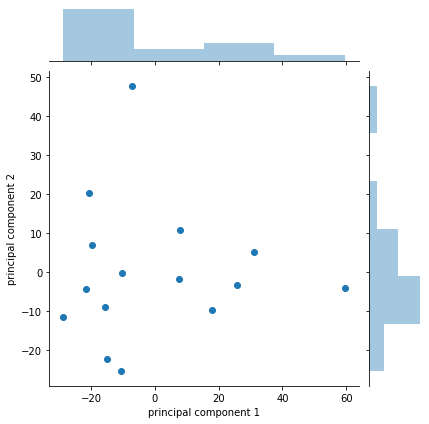

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.jointplot(x='principal component 1', y='principal component 2', data = principalDf)
plt.show()

__Ex3: PCA sklearn__
<br> sklearn.datasets.fetch_lfw_people, min_faces_per_person = 60
<br> Demensional Reduction = 150 components
<br> Visualization

In [24]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
faces

{'DESCR': ".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones

In [27]:
faces.target.shape

(1348,)

In [40]:
np.unique(faces.target)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [28]:
faces.data.shape

(1348, 2914)

In [29]:
faces.images.shape

(1348, 62, 47)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.explained_variance_ratio_.shape

(150,)

In [33]:
x = sum(pca.explained_variance_ratio_)
x

0.9457078313862439

In [34]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [36]:
components.shape

(1348, 150)

In [37]:
projected.shape

(1348, 2914)

Text(0, 0.5, '150-dim\nreconstruction')

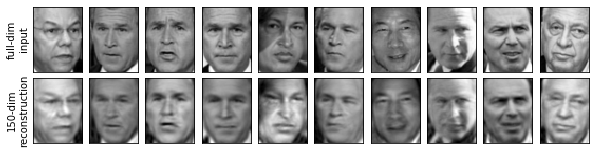

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
## Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47), cmap='binary_r')
    
ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')

__Ex4: PCA__
<br> Iris.xls
<br> correlation matrix
<br> PCA (n_components=2)

In [44]:
data = pd.read_excel('Iris.xls')
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
corr = data.corr()
corr

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


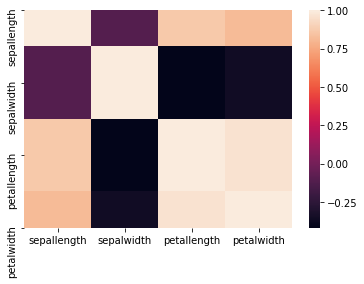

In [47]:
import seaborn as sns
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [48]:
A = data[['sepallength','sepalwidth','petallength','petalwidth']]

In [49]:
pca = PCA(2)
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [51]:
pca.explained_variance_

array([4.22484077, 0.24224357])

In [54]:
# transform data
B = pca.transform(A)
B[0:5]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [55]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [56]:
pricipalDf = pd.DataFrame(data = B
                         ,columns = ['principal component 1','principal component 2'])
y = np.array(data.iris)
y = pd.DataFrame(data = y, columns = ['types'])
finalDf = pd.concat([pricipalDf,y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,types
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


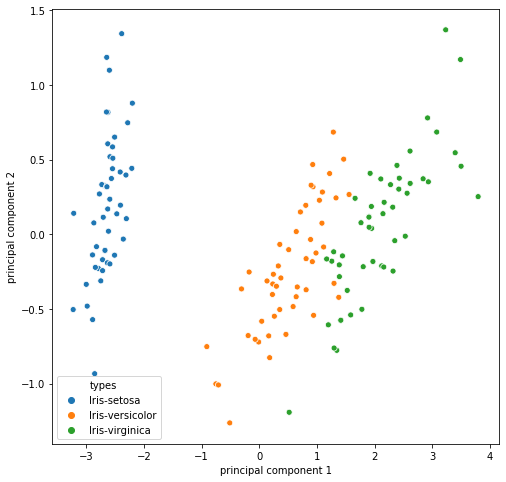

In [58]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='principal component 1', y='principal component 2', data = finalDf, hue='types')
plt.show()